<a href="https://colab.research.google.com/github/joemcl81/google_colab/blob/main/Single_Linear_regression_temperature_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

### Weather dataset

The dataset `weather_lab.csv` includes daily (min and max) temperature measured by a weather station
(366 data pairs).

We want to predict the MaxTemp based on the value of the MinTemp recorded. 

Since the output variable is continuous, this is a **regression problem**.

Your task is:
1. loading the dataset `weather_lab.csv` using pandas
2. counting the number of rows and the number of columns
3. splitting the dataset in inputs (denoted as X, that includes the column MinTemp) and output (denoted as y,  column MaxTemp) and transform it into a numpy array using `.values.`
4. plot the scatterplot of the data, this is the command

`plt.scatter(X,y)
plt.xlabel('MinTemp',fontsize=14)
plt.ylabel('MaxTemp',fontsize=14) `
5. Reshape X so it is a column vector `X=X.reshape(-1,1)`
6. randomly splitting the rows in (X,y) in training (60% of the rows) and testing (40% of the rows), you can use the function `train_test_split` from `sklearn`
7. training a `LinearRegression` model on the training dataset and predict the output variable for the testing dataset

`linreg = LinearRegression(fit_intercept=True)  
linreg.fit(x_train, y_train) #training the algorithm
y_pred_tr = linreg.predict(x_train)
y_pred_te = linreg.predict(x_test)`
8. computing the mean squared error (MSE) of the prediction error for the train and test set

`np.mean((y_pred_tr-y_train)**2)
np.mean((y_pred_te-y_test)**2)`

and root mean squared error (RMSE)


`np.sqrt(np.mean((y_pred_tr-y_train)**2))
np.sqrt(np.mean((y_pred_te-y_test)**2))`

RMSE gives the error in the same scale of `y`, 
e.g. RMSE=4 means that on average the error
in the predicted temperature is around $\pm 4$ degree.
9. You can plot the regression line as follows

`alpha = linreg.intercept_
beta = linreg.coef_[0]
plt.plot(X,alpha+beta*X,color='r')
plt.scatter(X,y)`


**Questions:**
10. Predict MaxTemp corresponding to the MinTemp=35, How do you that?
11. plot the predicted point together with the scatterplot of the data

In [14]:
#loading the dataset weather_lab.csv using pandas
import pandas as pd

df = pd.read_csv (r'/content/weather_lab (1).csv')
df


,Unnamed: 0,MinTemp,MaxTemp
0,0,8.0,24.3
1,1,14.0,26.9
2,2,13.7,23.4
3,3,13.3,15.5
4,4,7.6,16.1
...,...,...,...
361,361,9.0,30.7
362,362,7.1,28.4
363,363,12.5,19.9
364,364,12.5,26.9


In [15]:
# fetching the number of rows and columns 
rows = df.shape[0] 
cols = df.shape[1] 

#displaying the number of rows and columns 
print("Rows: " + str(rows)) 
print("Columns: " + str(cols)) 

Rows: 366
Columns: 3


In [17]:
X=df['MinTemp'].values.reshape(-1,1)
y=df['MaxTemp'].values

Text(0, 0.5, 'MaxTemp')

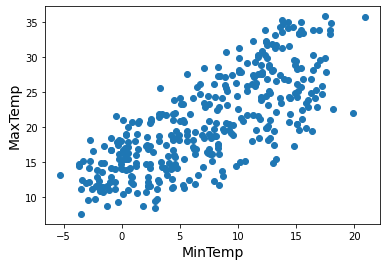

In [18]:
plt.scatter(X,y) 
plt.xlabel('MinTemp',fontsize=14) 
plt.ylabel('MaxTemp',fontsize=14)

In [19]:
X=X.reshape(-1,1)

In [20]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [23]:
linreg = LinearRegression(fit_intercept=True) 
linreg.fit(X_train, y_train) 
#training the algorithm y_pred_tr = linreg.predict(x_train) y_pred_te = linreg.predict(x_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_pred = linreg.predict(X_test)
df = pd.DataFrame({'Test data': y_test, 'Predicted':y_pred})
df

,Test data,Predicted
0,18.5,25.655484
1,20.7,27.048168
2,12.2,13.643586
3,28.4,20.694048
4,12.9,12.686116
...,...,...
142,8.7,16.080783
143,18.0,24.262801
144,18.0,14.426970
145,19.6,22.521946


In [32]:
#needs Y=y.reshape(-1,1) to run this
X_pred = linreg.predict(y_test)
df = pd.DataFrame({'Test data': X_test, 'Predicted':X_pred})
df

ValueError: ignored

In [33]:
y_pred_tr = linreg.predict(X_train)
y_pred_te = linreg.predict(X_test)

print('Mean Squared Error Training:', np.mean((y_train-y_pred_tr)**2))
print('RootMean Squared Error Training:', np.sqrt(np.mean((y_train-y_pred_tr)**2)))

print('Mean Squared Error Training:', np.mean((y_test-y_pred_te)**2))
print('RootMean Squared Error Training:', np.sqrt(np.mean((y_test-y_pred_te)**2)))

Mean Squared Error Training: 20.02905306162995
RootMean Squared Error Training: 4.475383007255351
Mean Squared Error Training: 18.691157276126656
RootMean Squared Error Training: 4.323327107231958


In [37]:
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_tr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_tr)))

Mean Squared Error: 20.02905306162995
Root Mean Squared Error: 4.475383007255351


In [36]:
y_pred = linreg.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 18.691157276126656
Root Mean Squared Error: 4.323327107231958


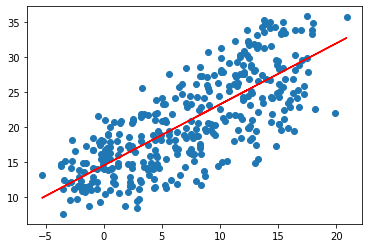

In [38]:
alpha = linreg.intercept_ 
beta = linreg.coef_[0] 
plt.plot(X,alpha+beta*X,color='r') 
plt.scatter(X,y)



Predicted MaxTemp at MinTemp=35  is  44.978973689642054


Text(0, 0.5, 'MaxTemp')

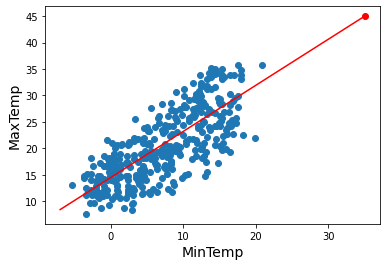

In [39]:
alpha = linreg.intercept_
beta = linreg.coef_[0]
print("Predicted MaxTemp at MinTemp=35  is ", alpha+beta*35)
plt.scatter(35,alpha+beta*35,color='r')
plt.scatter(X,y)
xx = np.linspace(-7,35,100)
plt.plot(xx,alpha+beta*xx,color='r')
plt.xlabel('MinTemp',fontsize=14)
plt.ylabel('MaxTemp',fontsize=14)

In [41]:
xx = np.linspace(-7,35,100)
print(alpha+beta*xx)

[ 8.42102107  8.79029332  9.15956556  9.52883781  9.89811006 10.26738231
 10.63665456 11.00592681 11.37519906 11.74447131 12.11374355 12.4830158
 12.85228805 13.2215603  13.59083255 13.9601048  14.32937705 14.6986493
 15.06792154 15.43719379 15.80646604 16.17573829 16.54501054 16.91428279
 17.28355504 17.65282729 18.02209953 18.39137178 18.76064403 19.12991628
 19.49918853 19.86846078 20.23773303 20.60700527 20.97627752 21.34554977
 21.71482202 22.08409427 22.45336652 22.82263877 23.19191102 23.56118326
 23.93045551 24.29972776 24.66900001 25.03827226 25.40754451 25.77681676
 26.14608901 26.51536125 26.8846335  27.25390575 27.623178   27.99245025
 28.3617225  28.73099475 29.100267   29.46953924 29.83881149 30.20808374
 30.57735599 30.94662824 31.31590049 31.68517274 32.05444498 32.42371723
 32.79298948 33.16226173 33.53153398 33.90080623 34.27007848 34.63935073
 35.00862297 35.37789522 35.74716747 36.11643972 36.48571197 36.85498422
 37.22425647 37.59352872 37.96280096 38.33207321 38.7

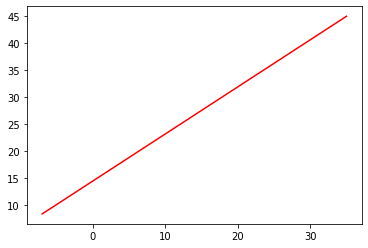

In [42]:
plt.plot(xx,alpha+beta*xx,color='r')